# Deep Convolutional Autoencoder on MNIST

In previous chapters, we explored classification, regression, and generative modeling pipelines.

Now we explore **unsupervised learning**: Autoencoders compress and reconstruct images.

Key concepts:

- **Encoder:** Compresses the input image into a latent vector.
- **Decoder:** Reconstructs the image from the latent vector.
- **Latent space:** Compressed representation capturing essential features.

We will use MNIST, a small handwritten digits dataset, to train a convolutional autoencoder entirely on CPU.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)

# Load MNIST Dataset

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)


TensorFlow version: 2.9.1
11490434/11490434 [==============================] - 13s 1us/step
Train shape: (60000, 28, 28, 1)


In [2]:
# Build Convolutional Autoencoder

latent_dim = 32

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Flatten(),
    layers.Dense(latent_dim)
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(7*7*64, activation='relu'),
    layers.Reshape((7,7,64)),
    layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same'),
    layers.Conv2D(1, 3, activation='sigmoid', padding='same')
])

# Autoencoder
inputs = tf.keras.Input(shape=(28,28,1))
latent = encoder(inputs)
outputs = decoder(latent)
autoencoder = tf.keras.Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 32)                119200    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         159169    
                                                                 
Total params: 278,369
Trainable params: 278,369
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Train Autoencoder

history = autoencoder.fit(
    x_train, x_train,
    validation_data=(x_test, x_test),
    epochs=5,  # CPU-friendly
    batch_size=64
)


Epoch 1/5
938/938 [==============================] - 62s 65ms/step - loss: 0.0256 - val_loss: 0.0071
Epoch 2/5
938/938 [==============================] - 70s 74ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 3/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 4/5
938/938 [==============================] - 67s 72ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/5
938/938 [==============================] - 69s 74ms/step - loss: 0.0039 - val_loss: 0.0040


1/1 [==============================] - 0s 146ms/step


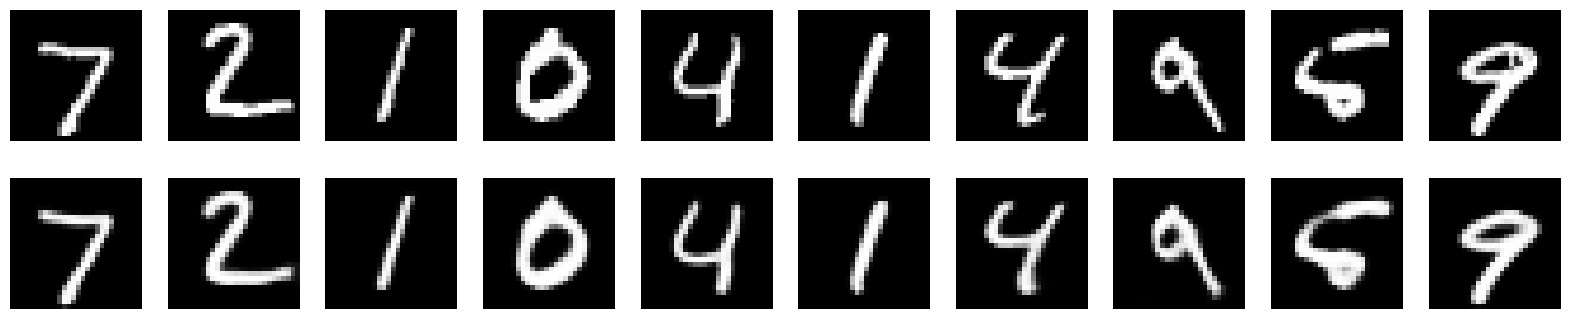

In [4]:
# Visualize Reconstructions

n = 10
decoded_imgs = autoencoder.predict(x_test[:n])

plt.figure(figsize=(20,4))
for i in range(n):
    # Original
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    plt.subplot(2,n,n+i+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()
